In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from pandas.api.types import CategoricalDtype

# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)


## Data wrangling - 1st phase -  after univariate analysis 

### Convert numerical variables that can be converted to nominal/ordinal category and fill the NA values

In [20]:
train['MSSubClass'] = train['MSSubClass'].astype('category')
test['MSSubClass'] = test['MSSubClass'].astype('category')

#### Convert numerical variables that can be converted to ordinal category

In [21]:
cat_type = CategoricalDtype([1,2,3,4,5,6,7,8,9,10],ordered = True)
for col in ['OverallQual', 'OverallCond']:
    train[col] = train[col].astype(cat_type)
    train[col] = train[col].astype(cat_type)

In [22]:
all_object_category_columns = train.select_dtypes(include = ['object', 'category']).columns

In [23]:
obj_categoryc_col_with_na = list(set(test[all_object_category_columns].isnull().sum()[test[all_object_category_columns].isnull().sum()!=0].index.tolist() + 
train[all_object_category_columns].isnull().sum()[train[all_object_category_columns].isnull().sum()!=0].index.tolist()))
obj_categoryc_col_with_na

['GarageQual',
 'GarageType',
 'MiscFeature',
 'BsmtCond',
 'PoolQC',
 'BsmtExposure',
 'GarageFinish',
 'GarageCond',
 'KitchenQual',
 'BsmtFinType1',
 'FireplaceQu',
 'Electrical',
 'BsmtQual',
 'SaleType',
 'BsmtFinType2',
 'Functional',
 'Alley',
 'Exterior1st',
 'Utilities',
 'Exterior2nd',
 'MasVnrType',
 'MSZoning',
 'Fence']

In [24]:
# list of columns which doesnt have NA as category and to be deleted from obj_categoryc_col_with_na
del_list = ['Exterior2nd', 'Functional', 'Utilities', 'SaleType', 'Electrical', 'KitchenQual','MSZoning','Exterior1st', 
           'MasVnrType']
for col in del_list:
    obj_categoryc_col_with_na.remove(col)
    
obj_categoryc_col_with_na

['GarageQual',
 'GarageType',
 'MiscFeature',
 'BsmtCond',
 'PoolQC',
 'BsmtExposure',
 'GarageFinish',
 'GarageCond',
 'BsmtFinType1',
 'FireplaceQu',
 'BsmtQual',
 'BsmtFinType2',
 'Alley',
 'Fence']

In [25]:
for col in obj_categoryc_col_with_na:
    print(col)
    train[col].fillna('None',inplace=True)
    test[col].fillna('None',inplace=True)

GarageQual
GarageType
MiscFeature
BsmtCond
PoolQC
BsmtExposure
GarageFinish
GarageCond
BsmtFinType1
FireplaceQu
BsmtQual
BsmtFinType2
Alley
Fence


#### Convert object variable to nominal category

In [26]:
nominal_cat = ['Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'MiscFeature', 'SaleType',
'SaleCondition'] 
for col in nominal_cat:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

#### To be converted into ordinal category

In [27]:
ordinal_cat = ['ExterQual', 'ExterCond',  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
'HeatingQC','KitchenQual', 'FireplaceQu','GarageQual', 'GarageFinish', 'GarageCond', 'PoolQC', 'Fence']

#### ExterQual and ExterCond

In [28]:
cat_type = CategoricalDtype(['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
train['ExterQual'] = train['ExterQual'].astype(cat_type)
test['ExterQual'] = test['ExterQual'].astype(cat_type)
train['ExterCond'] = train['ExterCond'].astype(cat_type)
test['ExterCond'] = test['ExterCond'].astype(cat_type)

Ordinal category variables which have NA which means None

In [29]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu', 'GarageQual', 'GarageFinish', 
 'GarageCond', 'PoolQC', 'Fence']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [30]:
# columns having same values
cat_type = CategoricalDtype(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
for col in ['BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']:
    train[col] = train[col].astype(cat_type)
    test[col] = test[col].astype(cat_type)

##### Fence

In [31]:
cat_type = CategoricalDtype(['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], ordered = True)
col = 'Fence'
train[col] = train[col].astype(cat_type)
test[col] = test[col].astype(cat_type)

##### GarageFinish

In [32]:
cat_type = CategoricalDtype(['None', 'Unf', 'RFn', 'Fin'], ordered = True)
col = 'GarageFinish'
train[col] = train[col].astype(cat_type)
test[col] = test[col].astype(cat_type)

##### BsmtFinType1 & BsmtFinType2

In [33]:
cat_type = CategoricalDtype(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered = True)
for col in ['BsmtFinType1', 'BsmtFinType2']:
    train[col] = train[col].astype(cat_type)
    test[col] = test[col].astype(cat_type)

 ##### BsmtExposure

In [34]:
col = 'BsmtExposure'
cat_type = CategoricalDtype(['None', 'No', 'Mn', 'Av', 'Gd'], ordered = True)
train[col] = train[col].astype(cat_type)
test[col] = test[col].astype(cat_type)

In [41]:
train[all_object_category_columns].isnull().sum()[train[all_object_category_columns].isnull().sum()!=0].index.to_list()

['MasVnrType', 'Electrical']

In [40]:
test[all_object_category_columns].isnull().sum()[test[all_object_category_columns].isnull().sum()!=0].index.to_list()

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'KitchenQual',
 'Functional',
 'SaleType']

In [42]:
cat_with_null_values = list(set(train[all_object_category_columns].isnull().sum()[train[all_object_category_columns].isnull().sum()!=0].index.to_list() + 
                               test[all_object_category_columns].isnull().sum()[test[all_object_category_columns].isnull().sum()!=0].index.to_list()))

In [38]:
dataset = pd.concat([train.drop(columns = ['SalePrice']), test], ignore_index = True)

Fixing object/categorical type with NA values

In [46]:
for col in cat_with_null_values:
    dataset[col] = dataset[col].fillna(dataset[col].value_counts().index[0])

## Data wrangling - 1st phase -  after univariate analysis 

### Fill NA values

#### Finding all numerical columns which have NA values


In [55]:
for col in dataset.isnull().sum()[dataset.isnull().sum() != 0].index.to_list():
    dataset[col] = dataset[col].fillna(dataset[col].median())

In [56]:
X_train = pd.concat([dataset.iloc[0:train.shape[0],:], train['SalePrice']], axis = 1)
test = dataset.iloc[train.shape[0]:,:]
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)


In [57]:
del(train)

In [58]:
train = X_train.copy()

CHeck if null values in train dataset

In [65]:
train.isnull().sum().sum()

0

CHeck if null values in test dataset

In [66]:
test.isnull().sum().sum()

0

## 3. Bivariate Analysis

### For numerical variable/continuous variables



In [60]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(train.select_dtypes(include = numeric_dtypes).columns)
numerical_columns.remove('Id')
numerical_columns.remove('SalePrice')
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [61]:
len(numerical_columns)

36

### Plot of relation of target variable to other variables

[Scipy stats Pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)

In [62]:
from scipy.stats import pearsonr

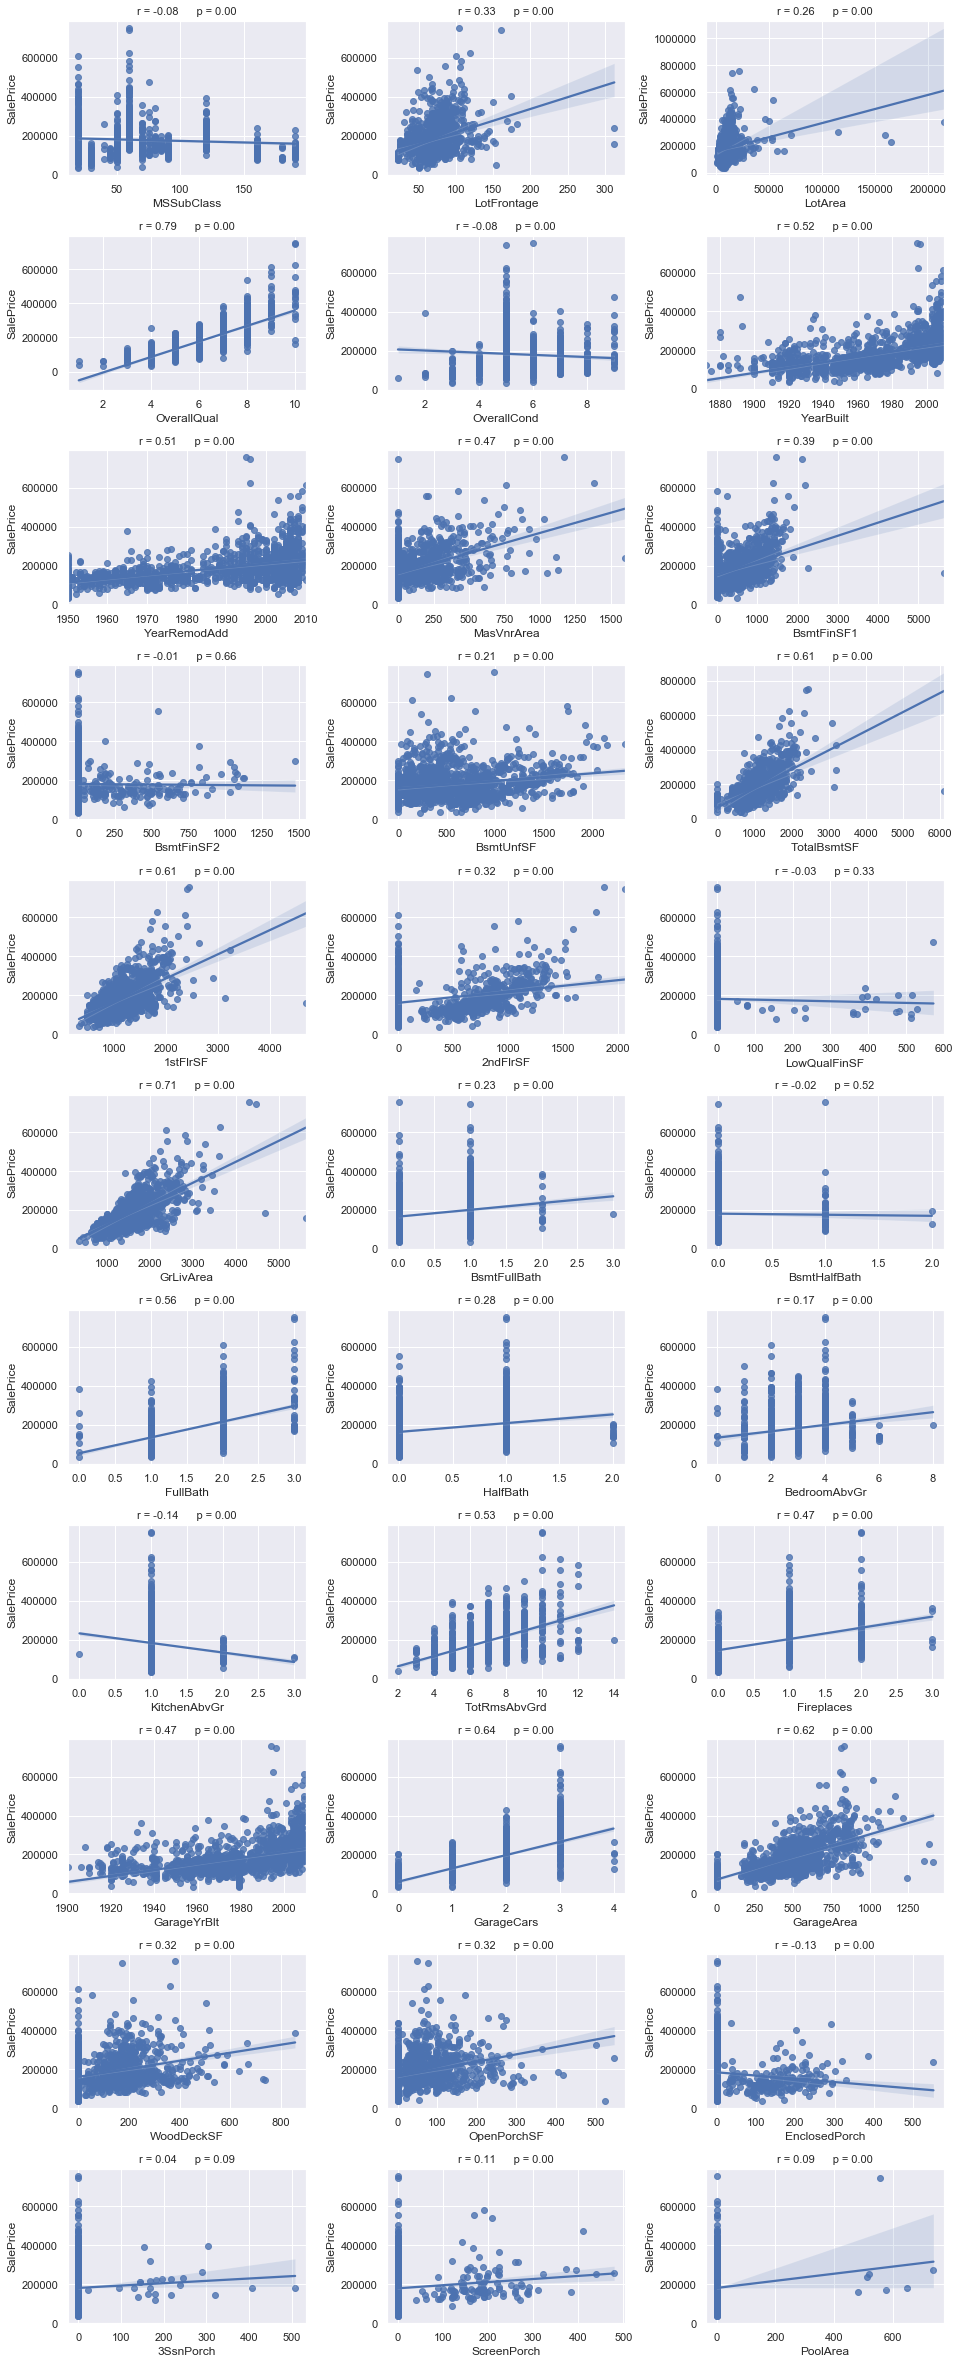

In [63]:
nr_rows = 11
nr_cols = 3
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3))
# for i, feature in enumerate(numerical_columns, start = 1):
#     sns.scatterplot(data = train, x = feature, y = 'SalePrice', axs = );
i = 0
for r in range(nr_rows):
    for c in range(nr_cols):
        sns.regplot(train[numerical_columns[i]], train['SalePrice'], ax = axs[r][c])
        stp = pearsonr(train[numerical_columns[i]], train['SalePrice'])
        i+=1
        str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
        axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout(); 
plt.show();

In [59]:
spread_df = pd.read_pickle('numerical_spread.pkl')
spread_df

,col_name,skewness,kurtosis,transformation_reqd
0,SalePrice,1.88288,6.53628,Yes
1,LotFrontage,2.16357,17.4529,Yes
2,LotArea,12.2077,203.243,Yes
3,YearBuilt,-0.613461,-0.439552,No
4,YearRemodAdd,-0.503562,-1.27225,Yes
5,MasVnrArea,2.66908,10.0824,Yes
6,BsmtFinSF1,1.6855,11.1182,Yes
7,BsmtFinSF2,4.25526,20.1133,Yes
8,BsmtUnfSF,0.920268,0.474994,No
9,TotalBsmtSF,1.52425,13.2505,Yes


From the spread_df remove the year data as their values skewness can be ignored.

In [70]:
spread_df.drop(columns = ['transformation_reqd'])

,col_name,skewness,kurtosis
0,SalePrice,1.88288,6.53628
1,LotFrontage,2.16357,17.4529
2,LotArea,12.2077,203.243
5,MasVnrArea,2.66908,10.0824
6,BsmtFinSF1,1.6855,11.1182
7,BsmtFinSF2,4.25526,20.1133
8,BsmtUnfSF,0.920268,0.474994
9,TotalBsmtSF,1.52425,13.2505
10,1stFlrSF,1.37676,5.74584
11,2ndFlrSF,0.81303,-0.553464


In [68]:
spread_df.drop([3,4], axis = 0, inplace = True)

Taking those columns which must be transformed based on their skewness

In [72]:
for col in spread_df['col_name'][spread_df['transformation_reqd']=='Yes']:
    train[col+'_Log'] = np.log(train[col])
    train.drop(columns = [col], inplace = True)
    test[col+'_Log'] = np.log(test[col])
    test.drop(columns = [col], inplace = True)

SalePrice


KeyError: 'SalePrice'

Reference:

1. [Using Subplots medium](https://medium.com/towards-artificial-intelligence/day-3-of-matplotlib-figure-axes-explained-in-detail-d6e98f7cd4e7)
2. [Subplots stackoverflow](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)